# <span style="color:red"><b>Predire la potabilità dell'Acqua: Un approccio basato su Machine Learning</b></span>

## <b><span style="color:orange"> 1. Analisi esplorativa dei dati (EDA) </span></b>


### <b>1.1 Startup e prima esplorazione del dataset </b>

In [1]:
#import librerie per analisi, manipolazione e visualizzione dei dati
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import degli algoritmi
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from lightgbm import LGBMClassifier

from xgboost import XGBClassifier

from catboost import CatBoostClassifier

#import per il bilanciamento dei dati
from imblearn.combine import SMOTEENN

#import degli scaler per normalizzazione
from sklearn.preprocessing import *

#import per k-fold cross validation e ottimizzazione iperparametri
from sklearn.model_selection import train_test_split, GridSearchCV

#import per report e classifiche
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# Caricamento del dataset 'water_dataset'
file_path = './water_potability.csv'
water_dataset = pd.read_csv(file_path)

# Visualizzazione dataset
water_dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
# Visualizzazione delle prime righe del dataset per comprendere la struttura dei dati
water_dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
water_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### <b>1.2 Statistiche generali del dataset</b>

In [5]:
# Calcolo delle statistiche descrittive per avere una panoramica delle feature in 'water_dataset'
water_dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### <b>1.3. Analisi univariata </b>

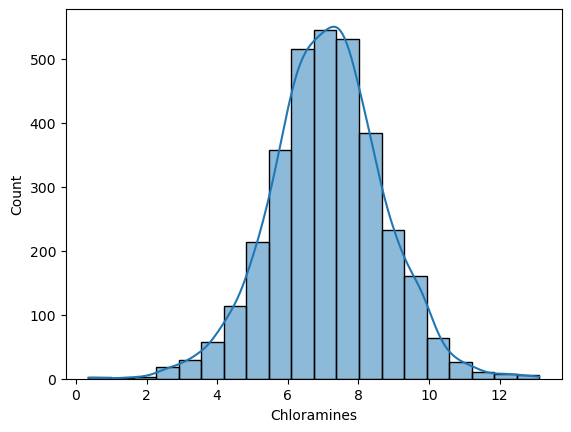

In [6]:
# Istogramma Clorammine
sns.histplot(x=water_dataset['Chloramines'], data=water_dataset, kde=True, bins=20)
plt.show()

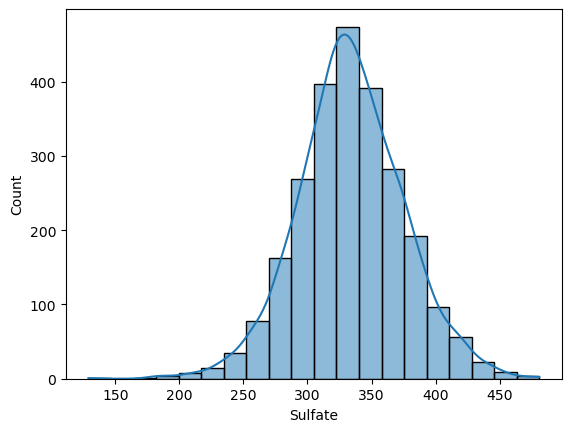

In [7]:
# Istogramma Solfati
sns.histplot(x=water_dataset['Sulfate'], data=water_dataset, kde=True, bins=20)
plt.show()

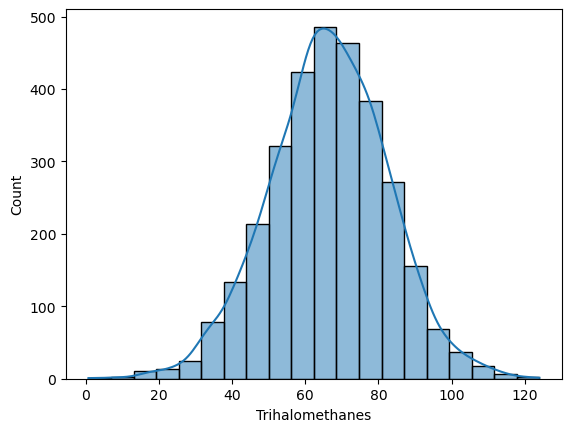

In [8]:
# Istogramma Trialometani
sns.histplot(x=water_dataset['Trihalomethanes'], data=water_dataset, kde=True, bins=20)
plt.show()

### <b>1.4 Analisi bivariata</b>

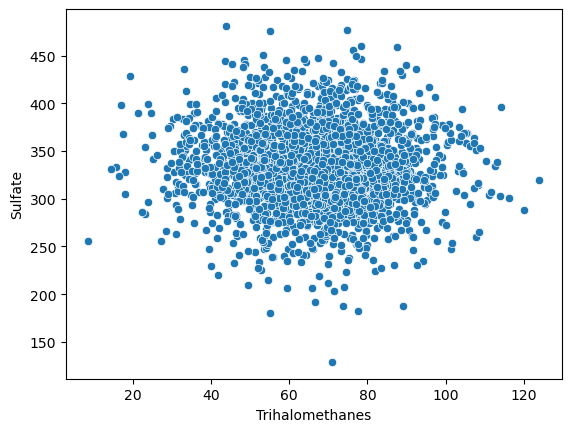

In [9]:
sns.scatterplot(x=water_dataset['Trihalomethanes'], y=water_dataset['Sulfate'], data=water_dataset)
plt.show()

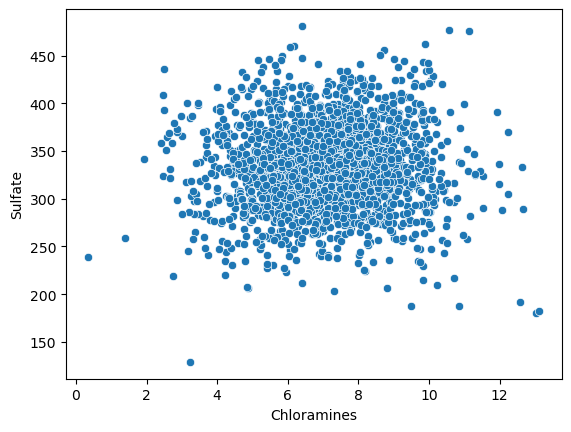

In [10]:
sns.scatterplot(x=water_dataset['Chloramines'], y=water_dataset['Sulfate'], data=water_dataset)
plt.show()

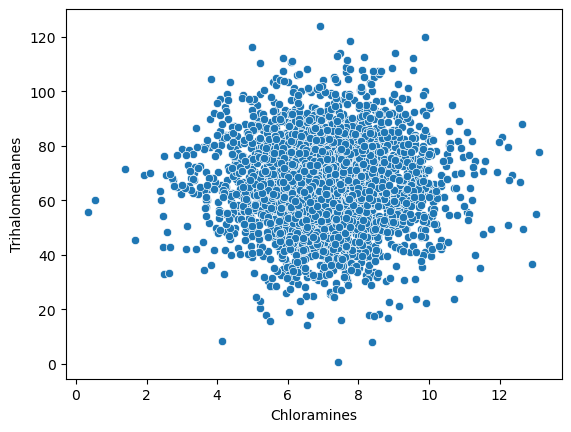

In [11]:
sns.scatterplot(x=water_dataset['Chloramines'], y=water_dataset['Trihalomethanes'], data=water_dataset)
plt.show()

### <b>1.5 Analisi multivariata </b>

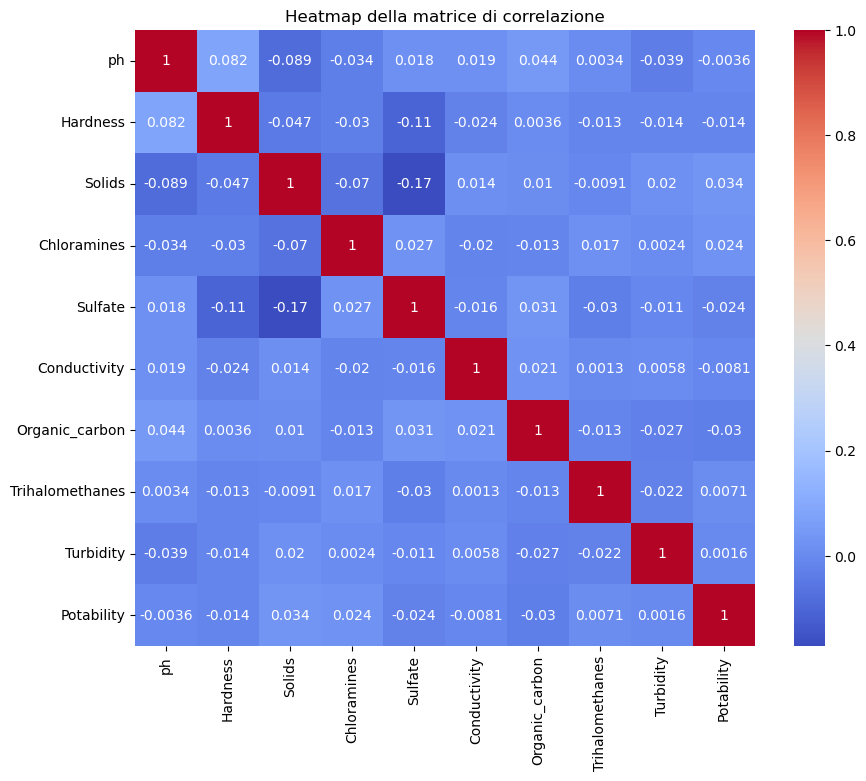

In [12]:
corr = water_dataset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap della matrice di correlazione')
plt.show()

### <b>1.6 Analisi distribuzione potabilità </b>

In [13]:
# Calcolo della distribuzione della variabile target 'Potability'
distribuzione_target = water_dataset['Potability'].value_counts(normalize=True)
distribuzione_target

Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64

In [14]:
# Per il conteggio assoluto basta togliere il paramaetro normalize
conteggio_target = water_dataset['Potability'].value_counts()
conteggio_target

Potability
0    1998
1    1278
Name: count, dtype: int64

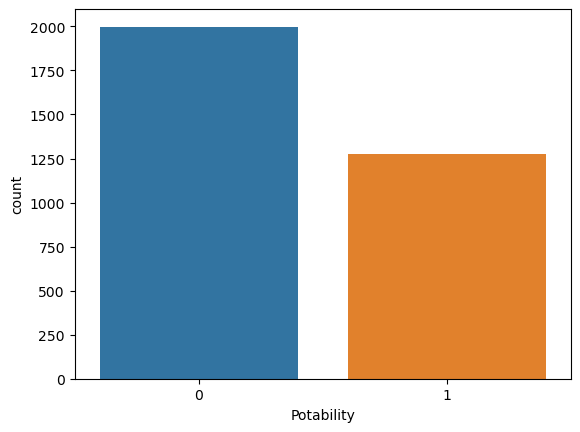

In [15]:
sns.countplot(x=water_dataset['Potability'], data=water_dataset)
plt.show()

### <b>1.7 Identificazione valori mancanti nel dataset</b>

In [16]:
# Verifica dei valori mancanti in 'water_dataset'
water_dataset.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

### <b>1.8 Identificazione degli outliers nel dataset</b>

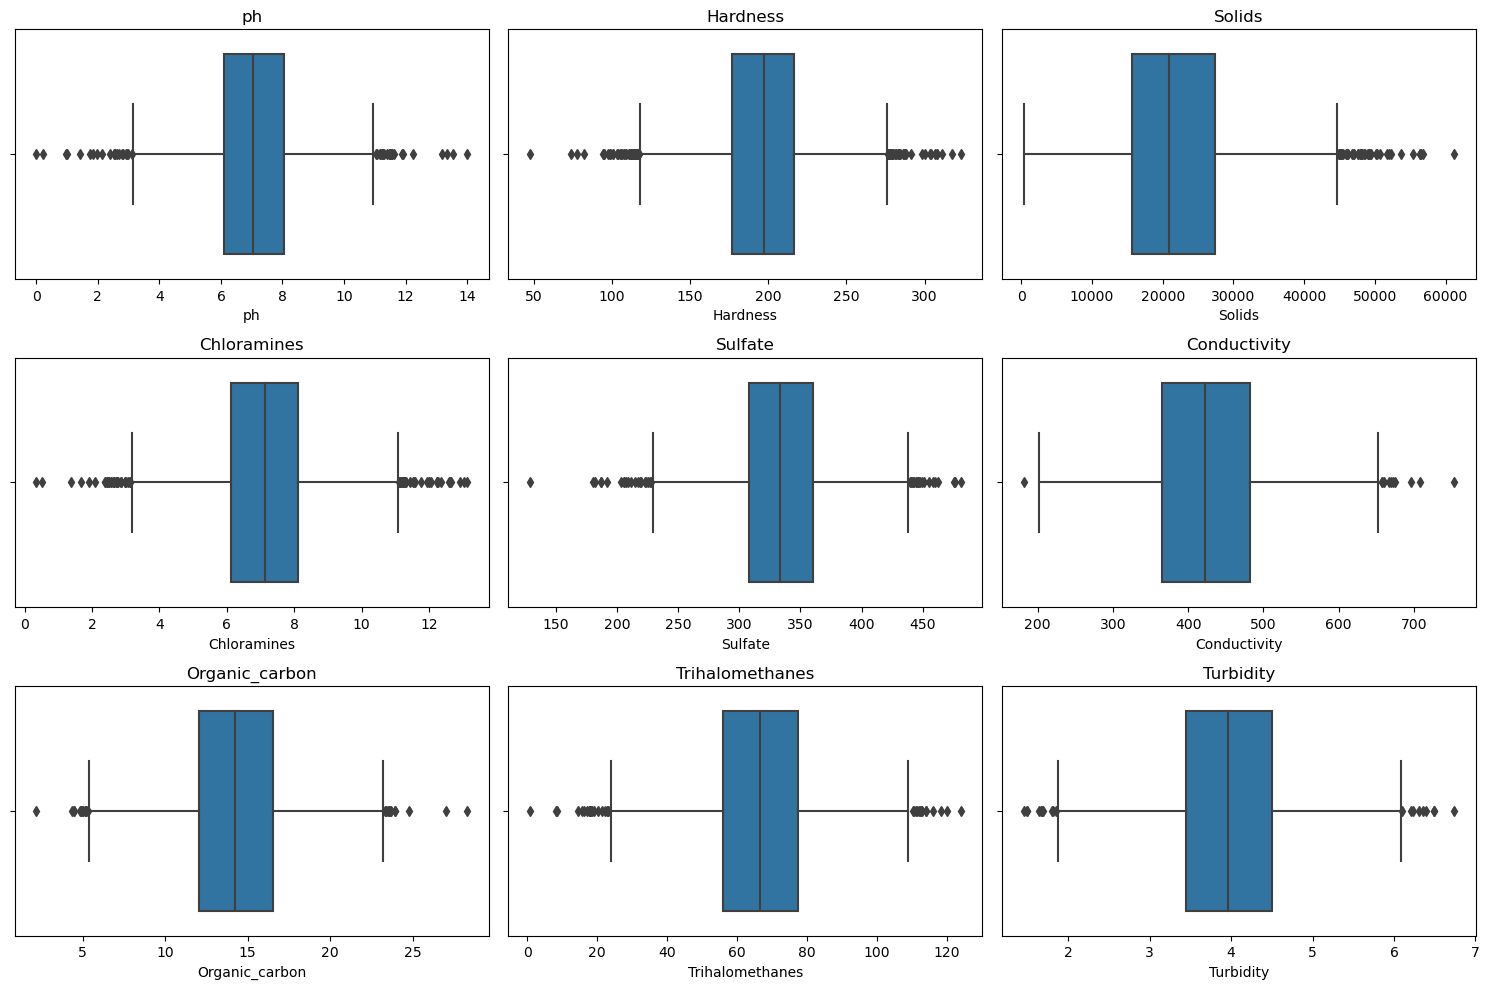

In [17]:
# Visualizzazione degli outliers con i boxplot per ciascuna feature numerica
plt.figure(figsize=(15, 10))
for i, col in enumerate(water_dataset.columns[:-1], 1):  # Escludiamo la variabile target
    plt.subplot(3, 3, i)
    sns.boxplot(data=water_dataset, x=col)
    plt.title(col)
plt.tight_layout()
plt.show()

## <b><span style="color:orange"> 2. Preparazione dei dati </span></b>

### <b> 2.1 Gestione valori mancanti</b>

In [18]:
# Gestione dei valori mancanti riempiendoli con la mediana per ciascuna colonna
for col in water_dataset.columns:
    if water_dataset[col].isnull().sum() > 0:  # Se ci sono valori mancanti
        median_value = water_dataset[col].median()
        water_dataset[col].fillna(median_value, inplace=True)

In [19]:
# Verifica che non ci siano più valori nulli
water_dataset.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [20]:
# Mostra il dataset dopo l'aggiunta dei valori mancanti NaN rimpiazzati con la mediana
water_dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


In [21]:
# Mostra le info dataset dopo l'aggiunta dei valori mancanti 
water_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Come si nota dal dataset e dalle info del dataset, non ci sono più valori nulli

### <b>2.2 Standardizzazione dei dati</b>

In [22]:
# #Utilizzo di MaxAbsScaler()
# scaler = MaxAbsScaler()

# # Utilizzo di MinMaxScaler()
# scaler = StandardScaler()

# # Utilizzo di MinMaxScaler()
# scaler = MinMaxScaler()

#Utilizzo di RobustScaler()
scaler = RobustScaler()

features_scaled = scaler.fit_transform(water_dataset.drop('Potability', axis=1))
water_dataset_scaled = pd.DataFrame(features_scaled, columns=water_dataset.columns[:-1])
water_dataset_scaled['Potability'] = water_dataset['Potability'].values
water_dataset_scaled

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.000000,0.198981,-0.011702,0.085492,1.064635,1.227178,-0.854560,1.017460,-0.935210,0
1,-2.085355,-1.696382,-0.196962,-0.249088,0.000000,1.473406,0.214093,-0.514183,0.514449,0
2,0.667161,0.684850,-0.087287,1.079558,0.000000,-0.028251,0.590024,-0.010110,-0.847715,0
3,0.803838,0.437145,0.093483,0.467446,0.715284,-0.505079,0.939076,1.684363,0.635242,0
4,1.290819,-0.398477,-0.252771,-0.293690,-0.689007,-0.202262,-0.592197,-1.729586,0.113188,0
...,...,...,...,...,...,...,...,...,...,...
3271,-1.487493,-0.082525,2.284673,0.018285,0.807273,0.900750,-0.072113,0.003257,0.453318,1
3272,0.484875,-0.085753,-0.308418,0.468467,0.000000,-0.253627,1.265600,0.000000,-1.090680,1
3273,1.496353,-0.532562,1.048146,0.110661,0.000000,0.087541,-0.707786,0.160993,-0.618656,1
3274,-1.199458,0.844770,-0.766665,-0.416079,0.000000,-0.163727,-0.678872,0.542772,0.710564,1


### <b>2.3 Bilanciamento dei dati</span>

In [23]:
# Bilanciamento del dataset se necessario
if distribuzione_target.iloc[0] / distribuzione_target.iloc[1] > 1.5:  # Esempio di soglia di squilibrio
    smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)
    X_sm, y_sm = smote_enn.fit_resample(water_dataset_scaled.drop('Potability', axis=1), water_dataset_scaled['Potability'])
    water_dataset_balanced = pd.concat([X_sm, y_sm], axis=1)
else:
    water_dataset_balanced = water_dataset_scaled.copy()

water_dataset_balanced

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,1.004220,0.160582,-0.621952,-1.291740,-0.894045,0.454279,-0.412864,-0.191028,0.420888,0
1,0.588912,0.545639,-0.185167,0.493133,0.000000,-0.497913,0.068437,0.492704,0.053451,0
2,0.288550,0.210397,0.639476,-1.035359,0.000000,0.196112,-0.220405,0.183712,0.775361,0
3,1.346922,1.929988,0.266884,-0.113365,1.960792,0.483290,-0.185001,0.241515,0.517281,0
4,1.217496,2.069209,-0.125787,-0.465909,0.000000,0.082364,-0.295998,-0.139930,-1.432141,0
...,...,...,...,...,...,...,...,...,...,...
1580,0.183992,-0.481933,-0.279566,-0.114675,-1.522283,0.046967,0.256308,0.844740,0.980826,1
1581,-1.170622,-0.716915,0.439201,0.164304,0.000000,-0.520176,-0.228585,-0.056199,0.007586,1
1582,0.045398,-1.534319,0.956339,1.279272,-1.972725,0.522199,0.105081,0.034086,0.856000,1
1583,-0.006853,-0.402485,0.793153,1.628125,-2.279173,0.568297,-0.642052,0.108029,-0.169401,1


## <b><span style="color:orange"> 3. Analisi dei dati post-preparazione </span></b>

### <b>3.1 Analisi univariata (post-preparazione dei dati) </b>

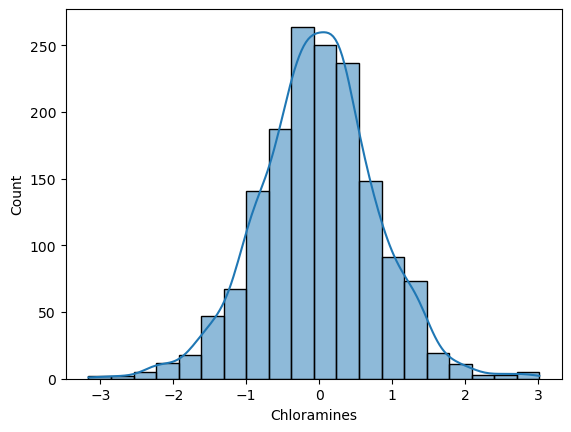

In [24]:
# Istogramma del pH
sns.histplot(x=water_dataset_balanced['Chloramines'], data=water_dataset_balanced, kde=True, bins=20)
plt.show()

### <b>3.2 Analisi bivariata (post-preparazione dei dati) </b>

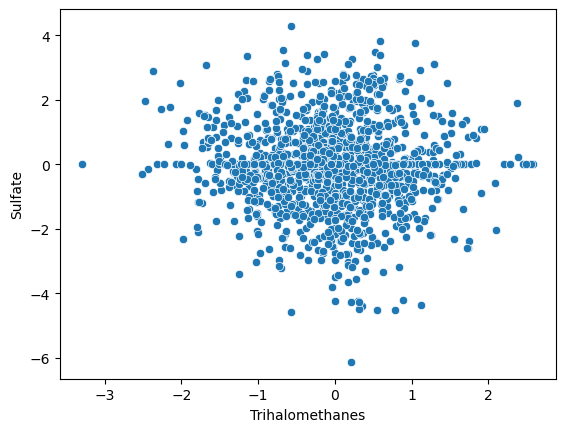

In [25]:
sns.scatterplot(x=water_dataset_balanced['Trihalomethanes'], y=water_dataset_balanced['Sulfate'], data=water_dataset_balanced)
plt.show()

### <b>3.3 Analisi distribuzione potabilità (post-preparazione dei dati)</b>

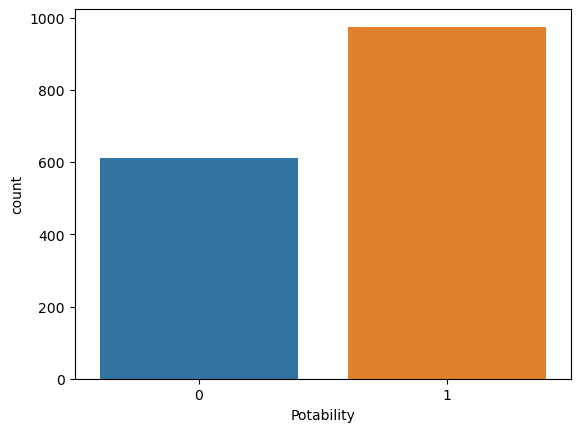

In [26]:
sns.countplot(x=water_dataset_balanced['Potability'], data=water_dataset_balanced)
plt.show()

In [27]:
# Calcolo della distribuzione della variabile target 'Potability'
distribuzione_balanced_target = water_dataset_balanced['Potability'].value_counts(normalize=True)
distribuzione_balanced_target

Potability
1    0.615142
0    0.384858
Name: proportion, dtype: float64

In [28]:
# Calcolo della distribuzione della variabile target 'Potability'
conteggio_balanced_target = water_dataset_balanced['Potability'].value_counts()
conteggio_balanced_target

Potability
1    975
0    610
Name: count, dtype: int64

## <b><span style="color:orange">4. Addestramento dei modelli</span></b>

### <b>4.1 Divisione features (X) e target(y) </b>

In [29]:
# Divisione del dataset in features (X) e target (y)
X = water_dataset_balanced.drop('Potability', axis=1)
y = water_dataset_balanced['Potability']

In [30]:
#Visualizzione features (X)
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,1.004220,0.160582,-0.621952,-1.291740,-0.894045,0.454279,-0.412864,-0.191028,0.420888
1,0.588912,0.545639,-0.185167,0.493133,0.000000,-0.497913,0.068437,0.492704,0.053451
2,0.288550,0.210397,0.639476,-1.035359,0.000000,0.196112,-0.220405,0.183712,0.775361
3,1.346922,1.929988,0.266884,-0.113365,1.960792,0.483290,-0.185001,0.241515,0.517281
4,1.217496,2.069209,-0.125787,-0.465909,0.000000,0.082364,-0.295998,-0.139930,-1.432141
...,...,...,...,...,...,...,...,...,...
1580,0.183992,-0.481933,-0.279566,-0.114675,-1.522283,0.046967,0.256308,0.844740,0.980826
1581,-1.170622,-0.716915,0.439201,0.164304,0.000000,-0.520176,-0.228585,-0.056199,0.007586
1582,0.045398,-1.534319,0.956339,1.279272,-1.972725,0.522199,0.105081,0.034086,0.856000
1583,-0.006853,-0.402485,0.793153,1.628125,-2.279173,0.568297,-0.642052,0.108029,-0.169401


In [31]:
#Visualizzazione Target
y

0       0
1       0
2       0
3       0
4       0
       ..
1580    1
1581    1
1582    1
1583    1
1584    1
Name: Potability, Length: 1585, dtype: int64

### <b>4.2 Divisione training set e test set</b>

In [32]:
# Divisione del dataset in set di training e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualizzazione delle dimensioni dei set per conferma
print("Dimensioni del set di training:", X_train.shape, y_train.shape)
print("Dimensioni del set di test:", X_test.shape, y_test.shape)

Dimensioni del set di training: (1109, 9) (1109,)
Dimensioni del set di test: (476, 9) (476,)


### <b>4.3 Fit dei modelli </b>

A questo punto, dopo aver diviso il dataset nel training set e nel test set, si può procedere all'addestramento (fit) di differenti modelli sul problema in esame

#### <span style="color:orange"> <b>4.3.1 Libreria 1: Scikit-learn ------------------------------------------------------------------------------------------</b></span>

##### <b>4.3.1.1 Logistic regression</b>

In [33]:
# Inizializzazione del modello di Logistic Regression
logistic_regression = LogisticRegression(random_state=42, max_iter=1000)

# Addestramento del modello sul set di training
logistic_regression.fit(X_train, y_train)
logistic_regression.score(X_test,y_test)

0.5819327731092437

In [34]:
y_pred_lr = logistic_regression.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.30      0.02      0.03       195
           1       0.59      0.98      0.73       281

    accuracy                           0.58       476
   macro avg       0.44      0.50      0.38       476
weighted avg       0.47      0.58      0.45       476



##### <b>4.3.1.2 KNN (k-Nearest neighbors)</b>

In [35]:
# Inizializzazione del modello di KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Addestramento del modello sul set di training
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.8571428571428571

In [36]:
# Predizione sul set di test
y_pred_knn = knn.predict(X_test)

# Calcolo delle metriche di prestazione usando il classification report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.72      0.80       195
           1       0.83      0.95      0.89       281

    accuracy                           0.86       476
   macro avg       0.87      0.84      0.85       476
weighted avg       0.86      0.86      0.85       476



##### <b>4.3.1.3 Decision tree classifier</b>

In [37]:
# Inizializzazione del modello Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)

# Addestramento del modello sul set di training
decision_tree.fit(X_train, y_train)
decision_tree.score (X_test,y_test)

0.7605042016806722

In [38]:
# Predizione sul set di test
y_pred_dt = decision_tree.predict(X_test)

# Calcolo delle metriche di prestazione usando il classification report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.74      0.64      0.69       195
           1       0.77      0.85      0.81       281

    accuracy                           0.76       476
   macro avg       0.76      0.74      0.75       476
weighted avg       0.76      0.76      0.76       476



##### <b>4.3.1.4 Bagging Classifier</b>

In [39]:
# Inizializzazione del modello LGBMClassifier
bagging = BaggingClassifier()

#Addestramento
bagging.fit(X_train, y_train)
bagging.score (X_test, y_test)

0.8319327731092437

In [40]:
# Predizione sul set di test
y_bag = bagging.predict(X_test)

# Calcolo delle metriche di prestazione usando il classification report
print(classification_report(y_test, y_bag))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       195
           1       0.84      0.88      0.86       281

    accuracy                           0.83       476
   macro avg       0.83      0.82      0.82       476
weighted avg       0.83      0.83      0.83       476



##### <b>4.3.1.5 Random forest classifier</b>

In [41]:
# Inizializzazione del modello Decision Tree
random_forest = RandomForestClassifier(random_state=42)

# Addestramento del modello sul set di training
random_forest.fit(X_train, y_train)
random_forest.score (X_test,y_test)

0.8466386554621849

In [42]:
# Predizione sul set di test
y_pred_rf = random_forest.predict(X_test)

# Calcolo delle metriche di prestazione usando il classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79       195
           1       0.82      0.95      0.88       281

    accuracy                           0.85       476
   macro avg       0.86      0.82      0.83       476
weighted avg       0.85      0.85      0.84       476



##### <b>4.3.1.6 Support Vector Machine</b>

In [43]:
# Inizializzazione del modello Decision Tree
support_vector_machine = SVC(random_state=42)

# Addestramento del modello sul set di training
support_vector_machine.fit(X_train, y_train)
support_vector_machine.score (X_test,y_test)

0.8151260504201681

In [44]:
# Predizione sul set di test
y_pred_svm = support_vector_machine.predict(X_test)

# Calcolo delle metriche di prestazione usando il classification report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.91      0.61      0.73       195
           1       0.78      0.96      0.86       281

    accuracy                           0.82       476
   macro avg       0.84      0.78      0.79       476
weighted avg       0.83      0.82      0.81       476



##### <b>4.3.1.7 AdaBoost</b>

In [45]:
# Inizializzazione del modello Decision Tree
ada_boost = AdaBoostClassifier(random_state=42)

# Addestramento del modello sul set di training
ada_boost.fit(X_train, y_train)
ada_boost.score (X_test,y_test)

0.6890756302521008

In [46]:
# Predizione sul set di test
y_pred_ada = ada_boost.predict(X_test)

# Calcolo delle metriche di prestazione usando il classification report
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.68      0.46      0.55       195
           1       0.69      0.85      0.76       281

    accuracy                           0.69       476
   macro avg       0.69      0.65      0.65       476
weighted avg       0.69      0.69      0.67       476



##### <b>4.3.1.8 GradientBoosting Classifier</b>

In [47]:
# Inizializzazione del modello Decision Tree
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Addestramento del modello sul set di training
gradient_boosting.fit(X_train, y_train)
gradient_boosting.score (X_test,y_test)

0.7878151260504201

In [48]:
# Predizione sul set di test
y_pred_gb = gradient_boosting.predict(X_test)

# Calcolo delle metriche di prestazione usando il classification report
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.84      0.60      0.70       195
           1       0.77      0.92      0.84       281

    accuracy                           0.79       476
   macro avg       0.80      0.76      0.77       476
weighted avg       0.80      0.79      0.78       476



##### <b>4.3.1.9 NaivesBayes classifier</b>

In [49]:
# Inizializzazione del modello Decision Tree
gaussian_NB = GaussianNB()

# Addestramento del modello sul set di training
gaussian_NB.fit(X_train, y_train)
gaussian_NB.score (X_test,y_test)

0.6449579831932774

In [50]:
# Predizione sul set di test
y_pred_nb = gaussian_NB.predict(X_test)

# Calcolo delle metriche di prestazione usando il classification report
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.64      0.31      0.42       195
           1       0.65      0.88      0.74       281

    accuracy                           0.64       476
   macro avg       0.64      0.59      0.58       476
weighted avg       0.64      0.64      0.61       476



#### <span style="color:yellow"> <b>4.3.2 Libreria 2: XGBC Library --------------------------------------------------------------------------------------------- </b></span>

##### <b>4.3.2.1 XGBC classifier</b>

In [51]:
xgbc = XGBClassifier(objective='binary:logistic',random_state=42)

# Addestramento del modello sul set di training
xgbc.fit(X_train,y_train)
xgbc.score (X_test,y_test)

0.8256302521008403

In [52]:
# Predizione sul set di test
y_pred_xgbc = xgbc.predict(X_test)

# Calcolo delle metriche di prestazione usando il classification report
print(classification_report(y_test, y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       195
           1       0.83      0.89      0.86       281

    accuracy                           0.83       476
   macro avg       0.82      0.81      0.82       476
weighted avg       0.83      0.83      0.82       476



#### <span style="color:green"><b>4.3.3 Libreria 3: Catboost library -----------------------------------------------------------------------------</b></span>

##### <b>4.3.3.1 Catboost classifier</b>

In [53]:
catboost = CatBoostClassifier(random_state=42)

# Addestramento del modello sul set di training
catboost.fit(X_train,y_train)
catboost.score(X_test,y_test)

Learning rate set to 0.010768
0:	learn: 0.6906328	total: 140ms	remaining: 2m 19s
1:	learn: 0.6866335	total: 143ms	remaining: 1m 11s
2:	learn: 0.6826250	total: 146ms	remaining: 48.4s
3:	learn: 0.6802737	total: 148ms	remaining: 37s
4:	learn: 0.6758543	total: 151ms	remaining: 30.1s
5:	learn: 0.6720631	total: 154ms	remaining: 25.5s
6:	learn: 0.6674468	total: 157ms	remaining: 22.2s
7:	learn: 0.6639721	total: 160ms	remaining: 19.8s
8:	learn: 0.6600806	total: 163ms	remaining: 17.9s
9:	learn: 0.6574438	total: 166ms	remaining: 16.4s
10:	learn: 0.6543611	total: 169ms	remaining: 15.2s
11:	learn: 0.6513166	total: 172ms	remaining: 14.2s
12:	learn: 0.6478524	total: 175ms	remaining: 13.3s
13:	learn: 0.6436018	total: 178ms	remaining: 12.5s
14:	learn: 0.6401138	total: 181ms	remaining: 11.9s
15:	learn: 0.6355119	total: 183ms	remaining: 11.3s
16:	learn: 0.6326359	total: 186ms	remaining: 10.8s
17:	learn: 0.6301152	total: 189ms	remaining: 10.3s
18:	learn: 0.6285104	total: 192ms	remaining: 9.92s
19:	learn: 

0.8403361344537815

In [54]:
# Predizione sul set di test
y_pred_cb = catboost.predict(X_test)

# Calcolo delle metriche di prestazione usando il classification report
print(classification_report(y_test, y_pred_cb))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78       195
           1       0.82      0.94      0.87       281

    accuracy                           0.84       476
   macro avg       0.85      0.82      0.83       476
weighted avg       0.85      0.84      0.84       476



#### <span style="color:violet"><b>4.3.4 Libreria 4: LightGMB library -------------------------------------------------------------------------------------</b></span>

##### <b>4.3.4.1 LightGBM Classifier</b>

In [55]:
# Inizializzazione del modello LGBMClassifier
lgbm = LGBMClassifier()

# Addestramento del modello sul set di training
lgbm.fit(X_train, y_train)
lgbm.score(X_test,y_test)

[LightGBM] [Info] Number of positive: 694, number of negative: 415
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 1109, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625789 -> initscore=0.514193
[LightGBM] [Info] Start training from score 0.514193


0.8214285714285714

In [56]:
# Predizione sul set di test
y_lgbm = lgbm.predict(X_test)

# Calcolo delle metriche di prestazione usando il classification report
print(classification_report(y_test, y_lgbm))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76       195
           1       0.81      0.91      0.86       281

    accuracy                           0.82       476
   macro avg       0.83      0.80      0.81       476
weighted avg       0.82      0.82      0.82       476



### <b>4.4 Selezione modelli più promettenti</b>

In base agli addestramenti i modelli più promettenti risultano essere:
- RandomForest classifier
- Gradient boost classifier
- Bagging classifier
- LGBMC classifier
- XGBC classifier

Quindi si procede con la cross validazione e quindi l'ottimizzazione degli iperparametri di questi algoritmi.

## <b><span style="color:orange"> 5. Ottimizzazione iperparametri e validazione con k-fold cross validation </span></b>

In [57]:
# Definizione dei modelli e delle griglie di parametri
models_param_grid = {
    RandomForestClassifier(random_state=42): {
        'n_estimators': [100, 200],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5]
    },
    GradientBoostingClassifier(random_state=42): {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    BaggingClassifier(random_state=42): {
        'n_estimators': [10, 50],
        'max_samples': [0.5, 1.0],
        'max_features': [0.5, 1.0],
    },
    LGBMClassifier(random_state=42): {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [31, 41],  # Numero di foglie in un albero
    },
    XGBClassifier(random_state=42): {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.8, 1],
        'colsample_bytree': [0.8, 1],
    },
}

# Risultati dell'ottimizzazione
best_models = []

# Ciclo sugli modelli e sulle griglie di parametri per eseguire GridSearchCV
for model, param_grid in models_param_grid.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    
    # Stampa dei risultati per il modello corrente
    print(f"Modello: {model.__class__.__name__}")
    print("Migliori parametri:", grid_search.best_params_)
    print("Miglior punteggio di cross-validation:", grid_search.best_score_)
    print('')
    
    # Salvataggio del miglior modello trovato
    best_models.append(grid_search.best_estimator_)

# Ora `best_models` contiene i migliori estimatori per gli algoritmi selezionati

Fitting 5 folds for each of 8 candidates, totalling 40 fits


Modello: RandomForestClassifier
Migliori parametri: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Miglior punteggio di cross-validation: 0.8260119848355142

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Modello: GradientBoostingClassifier
Migliori parametri: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Miglior punteggio di cross-validation: 0.8160735396029514

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Modello: BaggingClassifier
Migliori parametri: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}
Miglior punteggio di cross-validation: 0.8259956789368553

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Info] Number of positive: 694, number of negative: 415
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points 

## <b><span style="color:orange"> 6. Valutazione finale dei modelli e conclusioni sul progetto</span></b>


### <b>6.1 Report di classificazione finale dei vari modelli</b>

In [58]:
# Ciclo sui migliori modelli per fare previsioni e valutarne le prestazioni sul set di test
for model in best_models:
    # Predizione sul set di test
    y_pred = model.predict(X_test)
    
    # Calcolo delle metriche di prestazione usando il classification report
    report = classification_report(y_test, y_pred)
    
    # Stampa del report di classificazione
    print(f"Modello: {model.__class__.__name__}\n")
    print(report)
    print("="*80)  # Separatore per rendere l'output più leggibile

Modello: RandomForestClassifier

              precision    recall  f1-score   support

           0       0.91      0.68      0.78       195
           1       0.81      0.95      0.88       281

    accuracy                           0.84       476
   macro avg       0.86      0.82      0.83       476
weighted avg       0.85      0.84      0.84       476

Modello: GradientBoostingClassifier

              precision    recall  f1-score   support

           0       0.89      0.67      0.76       195
           1       0.80      0.94      0.87       281

    accuracy                           0.83       476
   macro avg       0.85      0.80      0.81       476
weighted avg       0.84      0.83      0.82       476

Modello: BaggingClassifier

              precision    recall  f1-score   support

           0       0.88      0.71      0.79       195
           1       0.82      0.94      0.88       281

    accuracy                           0.84       476
   macro avg       0.85      0

### <b>6.2 Aggiunta metrica AUC-ROC e confronto con le altre metriche</b>

In [59]:
# Inizializzazione di una lista per raccogliere i risultati
model_results = []

# Ciclo sui migliori modelli per fare previsioni e raccogliere le prestazioni
for model in best_models:
    # Predizione sul set di test
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilità per la classe positiva

    # Calcolo delle metriche di prestazione
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)

    # Aggiunta dei risultati alla lista
    model_results.append({
        'Modello': model.__class__.__name__,
        'AUC-ROC': auc_roc,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    })

# Conversione della lista dei risultati in un DataFrame
results_df = pd.DataFrame(model_results)

# Ordinamento del DataFrame in base a una metrica a tua scelta, ad esempio AUC-ROC
ranked_df = results_df.sort_values(by='AUC-ROC', ascending=False)
styled_df = ranked_df.style.background_gradient(cmap='inferno', subset=['AUC-ROC','Precision','Recall','Accuracy', 'F1 Score'])

# Visualizzazione del DataFrame stilizzato
styled_df

,Modello,AUC-ROC,Accuracy,Precision,Recall,F1 Score
0,RandomForestClassifier,0.938243,0.840336,0.809668,0.953737,0.875817
3,LGBMClassifier,0.927274,0.838235,0.824841,0.921708,0.870588
2,BaggingClassifier,0.924500,0.842437,0.821875,0.935943,0.875208
4,XGBClassifier,0.912200,0.840336,0.821317,0.932384,0.873333
1,GradientBoostingClassifier,0.910904,0.829832,0.803030,0.943060,0.867430


### <b>6.3 Conclusioni sui report di classificazione delle metriche dei modelli ottimizzati</b>

Quindi, si deduce che il RandomForrestClassifier possa essere candidato per essere il miglior classificatore ed affrontare questo problema